In [1]:
# Bibliothéque
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from langdetect import detect #permet de détecter automatiquement la langue d’un texte.

In [3]:
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
import re

In [5]:
df = pd.read_excel("df_word_cloud.xlsx")

In [6]:
df.head()

,ID_CLT_final,id_client,Numéro Client,Age,Genre,Date de retour,Langue,Avis Client,Note,Type de problème,...,Connection Type,Customer Type,Customer Tenure,Tarif nom (Forfait),Segment Client,Numéro Ooredoo,Numero Final,Latitude,Longitude,Localisation_norm
0,21624737244,1,24737244.0,15-25,Homme,2025-01-10,en,"Excellent 5G coverage, very satisfied!",5.0,Stabilité,...,Prepaid,B2B,more than 15 year,Offre 1000,Entreprise,24296663,24737244,35.8256,10.6084,sousse
1,21625876567,2,25876567.0,25-35,Femme,2025-03-07,fr,La couverture est excellente dans ma région.,5.0,Service client,...,Paid,B2C,less than 10 year,Offre 1000,High value,25857179,25876567,36.8065,10.1815,tunis
2,21622656507,3,22656507.0,35-45,Homme,2025-02-05,ar,تغطية 5G ممتازة، أنا راضٍ جدًا!,5.0,Couverture,...,Paid,B2B,0 to 3 months,Offre 1000,High value,26010443,22656507,36.8065,10.1815,tunis
3,21625987154,4,25987154.0,45-55,Femme,2025-03-18,ar,كنكسيون خايبة,1.0,Stabilité,...,Prepaid,B2B,more than 2 years,Offre 1000,High value,27337396,25987154,35.8256,10.6084,sousse
4,21620546148,5,20546148.0,15-25,Homme,2025-04-09,fr,La 5G fonctionne bien mais parfois instable.,4.0,Service client,...,Paid,B2B,0 to 6 months,Offre 1000,High value,20011424,20546148,36.4519,10.7363,nabeul


In [7]:
df.shape

(1488, 25)

In [8]:
# Concaténer tous les commentaires
textes= ' '.join(df['Avis Client'].dropna().astype(str))

# Nettoyer le texte (enlever ponctuations et mettre en minuscule)
textes = re.sub(r'[^a-zA-Z0-9\u0600-\u06FF\s]', '', textes.lower())

# Découper en mots
mots = textes.split()

In [9]:
# Compter les mots
compteur = Counter(mots)

# Afficher les mots les plus fréquents
top_mots = compteur.most_common()

for mot, count in top_mots:
    print(f"{mot} : {count}")

the : 453
i : 329
and : 292
to : 275
is : 233
a : 229
it : 213
5g : 208
you : 195
for : 186
ooredoo : 117
w : 113
in : 111
but : 110
of : 108
have : 103
that : 102
el : 100
with : 97
my : 92
في : 90
on : 90
not : 88
can : 88
service : 87
they : 86
or : 81
de : 78
و : 78
its : 78
4g : 77
if : 73
this : 70
so : 68
speed : 63
jdid : 60
get : 59
are : 59
your : 58
as : 57
app : 56
internet : 56
from : 54
le : 53
good : 53
be : 52
fix : 52
la : 50
at : 50
just : 50
orange : 49
لا : 48
what : 46
pas : 45
ken : 44
im : 43
ma : 42
u : 42
same : 42
je : 41
dont : 41
there : 41
about : 41
no : 40
do : 40
download : 40
use : 39
think : 39
me : 38
bien : 37
will : 37
thats : 37
en : 36
et : 36
جيد : 35
plus : 34
application : 34
where : 34
only : 34
very : 33
client : 33
box : 33
fixe : 33
pour : 32
an : 32
them : 32
fiber : 32
rseau : 31
even : 31
pay : 31
50 : 31
also : 31
sometimes : 30
جدا : 30
one : 30
tt : 30
any : 29
fama : 28
0 : 28
all : 28
still : 28
really : 28
customer : 27
connection 

In [10]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
print(df.columns)

Index(['id_clt_final', 'id_client', 'numéro client', 'age', 'genre',
       'date de retour', 'langue', 'avis client', 'note', 'type de problème',
       'localisation', 'score de sentiment', 'émotion détectée',
       'probabilité de churn', 'résumé de l’avis', 'connection type',
       'customer type', 'customer tenure', 'tarif nom (forfait)',
       'segment client', 'numéro ooredoo', 'numero final', 'latitude',
       'longitude', 'localisation_norm'],
      dtype='object')


In [11]:
print(df['langue'].value_counts())

langue
en    563
ar    385
fr    261
so     39
fa     26
de     25
nl     20
ca     18
ur     18
cy     18
id     16
sl     15
es     13
af     11
da     10
pt      8
sw      7
et      7
it      5
no      4
tl      4
hr      3
tr      2
sv      2
cs      2
sk      2
sq      2
fi      1
lv      1
Name: count, dtype: int64


In [12]:
df_freq = pd.DataFrame(top_mots, columns=["Avis Client", "Fréquence"])
print(df_freq.to_string())  # Affiche tout sans tronquer

                                                                                                                                                                                                       Avis Client  Fréquence
0                                                                                                                                                                                                              the        453
1                                                                                                                                                                                                                i        329
2                                                                                                                                                                                                              and        292
3                                                                                                               

In [13]:
df_freq.to_excel("frequence_mots.xlsx", index=False)

In [14]:
# 1) Normaliser tous les noms de colonnes
df.columns = (
    df.columns
      .str.strip()          # enlève espaces début/fin
      .str.lower()          # passe en minuscules
      .str.replace(' ', '_')  # remplace espaces par '_'
)

# 2) Vérifier le résultat
print(df.columns)

Index(['id_clt_final', 'id_client', 'numéro_client', 'age', 'genre',
       'date_de_retour', 'langue', 'avis_client', 'note', 'type_de_problème',
       'localisation', 'score_de_sentiment', 'émotion_détectée',
       'probabilité_de_churn', 'résumé_de_l’avis', 'connection_type',
       'customer_type', 'customer_tenure', 'tarif_nom_(forfait)',
       'segment_client', 'numéro_ooredoo', 'numero_final', 'latitude',
       'longitude', 'localisation_norm'],
      dtype='object')


In [15]:
groupes = ["fr", "en", "ar", "autre"]  # on l’appelle 'groupes' pour éviter la confusion

freq_par_groupe = {}

for grp in groupes:
    if grp == "autre":
        df_filtre = df[~df["langue"].isin(["fr", "en", "ar"])]
    else:
        df_filtre = df[df["langue"] == grp]

    textes = df_filtre["avis_client"].dropna().tolist()

    mots = []
    for texte in textes:
        # on convertit en str au cas où il resterait des valeurs non‐texte
        mots += re.findall(r'\b\w+\b', str(texte).lower())

    freq_par_groupe[grp] = Counter(mots)

# Affichage du top‑10 par groupe
for grp, compteur in freq_par_groupe.items():
    print(f"\n--- Langue : {grp.upper()} ---")
    for mot, freq in compteur.most_common():
        print(f"{mot} : {freq}")



--- Langue : FR ---
de : 74
le : 48
la : 46
service : 46
pas : 42
je : 39
est : 38
à : 38
l : 34
et : 34
a : 30
pour : 30
en : 28
application : 28
5g : 26
réseau : 26
plus : 26
très : 25
ne : 24
mais : 22
client : 22
n : 22
j : 22
d : 22
ma : 20
bien : 20
ooredoo : 19
fonctionne : 18
null : 18
mon : 16
ai : 16
un : 16
que : 16
les : 16
internet : 16
0 : 16
région : 14
parfois : 14
instable : 14
il : 14
dans : 12
trop : 12
lent : 12
des : 12
problème : 11
ancienne : 10
par : 10
bonne : 10
une : 10
étoile : 10
on : 10
vous : 10
connexion : 9
couverture : 8
répondu : 8
offre : 8
peux : 8
malheureusement : 8
y : 8
manque : 8
100 : 8
3al : 8
suis : 7
depuis : 7
ans : 7
avec : 7
it : 7
excellente : 6
perds : 6
souvent : 6
appel : 6
vidéo : 6
satisfait : 6
mauvaise : 6
me : 6
qu : 6
mieux : 6
merci : 6
bon : 6
1 : 6
arrive : 6
si : 6
votre : 6
facture : 6
cette : 6
qualité : 6
renouvellement : 6
app : 6
jours : 6
jamais : 6
sans : 6
double : 6
après : 6
fait : 6
réclamations : 6
mérite : 6
n

In [16]:
# Après la boucle précédente
compteur_autre = freq_par_groupe["autre"]

print("--- Langue : AUTRE ---")
for mot, freq in compteur_autre.most_common(20):  # tu peux changer 20 selon le nombre voulu
    print(f"{mot} : {freq}")

--- Langue : AUTRE ---
w : 35
5g : 32
ooredoo : 32
el : 28
good : 21
bien : 17
ken : 16
jdid : 16
4g : 12
fi : 11
i : 11
جدا : 11
nbadel : 11
fama : 10
app : 10
0 : 10
جيد : 10
fixe : 10
tunisie : 10
andi : 10


In [17]:
remplacements = {
    # Français
    "app": "application",
    "appli": "application",
    "reseau": "réseau",
    "connexion": "connection",

    # Arabe → Français
    "جيد": "bien",
    "جدا": "bien",

    # Tu peux continuer ici…
}

In [18]:
mots_detecteurs_fr = set(remplacements.keys())  # mots déclencheurs pour avis français

freq_par_langue = {}
langues = ["fr", "en", "ar", "autre"]

for langue in langues:
    if langue == "autre":
        df_autre = df[~df["langue"].isin(["fr", "en", "ar"])].copy()

        def ressemble_a_du_francais(texte):
            if pd.isna(texte):
                return False
            mots = re.findall(r'\b\w+\b', texte.lower())
            return any(mot in mots_detecteurs_fr for mot in mots)

        df_fr_detecte = df_autre[df_autre["avis_client"].apply(ressemble_a_du_francais)]
        df_autres_reels = df_autre[~df_autre.index.isin(df_fr_detecte.index)]

        # Reclassification FR
        textes_fr = df_fr_detecte["avis_client"].tolist()
        mots_fr = []
        for texte in textes_fr:
            for mot in re.findall(r'\b\w+\b', texte.lower()):
                mots_fr.append(remplacements.get(mot, mot))
        freq_par_langue["fr"] += Counter(mots_fr) if "fr" in freq_par_langue else Counter(mots_fr)

        # Autres non français
        textes_autres = df_autres_reels["avis_client"].tolist()
        mots_autres = []
        for texte in textes_autres:
            for mot in re.findall(r'\b\w+\b', texte.lower()):
                mots_autres.append(remplacements.get(mot, mot))
        freq_par_langue["autre"] = Counter(mots_autres)

    else:
        df_filtre = df[df["langue"] == langue]
        textes = df_filtre["avis_client"].dropna().tolist()
        mots = []
        for texte in textes:
            for mot in re.findall(r'\b\w+\b', texte.lower()):
                mots.append(remplacements.get(mot, mot))
        freq_par_langue[langue] = Counter(mots)


In [19]:
for langue, compteur in freq_par_langue.items():
    print(f"\n--- Langue : {langue.upper()} ---")
    for mot, freq in compteur.most_common(10):
        print(f"{mot} : {freq}")



--- Langue : FR ---
de : 74
le : 48
service : 48
la : 46
application : 46
pas : 42
bien : 41
je : 39
est : 38
à : 38

--- Langue : EN ---
the : 446
i : 357
and : 286
it : 274
to : 273
you : 223
is : 221
a : 195
for : 186
s : 132

--- Langue : AR ---
في : 89
و : 78
لا : 52
bien : 48
ا : 39
5g : 37
من : 26
تطبيق : 26
انا : 25
جد : 24

--- Langue : AUTRE ---
5g : 32
ooredoo : 32
w : 29
el : 26
good : 19
bien : 17
ken : 16
jdid : 16
4g : 12
fi : 11


In [20]:
# tous les mots issus des avis reclassés en français
mots_reclasses_fr = Counter()

for texte in df_fr_detecte["avis_client"]:
    mots_reclasses_fr.update(re.findall(r'\b\w+\b', texte.lower()))

print("\nTop 20 mots (avis reclassés en FR) :")
for mot, n in mots_reclasses_fr.most_common(20):
    print(f"{mot:15} {n}")


Top 20 mots (avis reclassés en FR) :
جدا             11
app             10
0               10
جيد             10
w               6
kol             4
a7la            4
connexion       3
el              2
barcha          2
5ra             2
jeux            2
aamlinha        2
kedhba          2
wsore9          2
service         2
0000000000000000 2
tabdila         2
mta3            2
ma              2


In [21]:
# Afficher uniquement les mots français (incluant ceux détectés dans "autre")
print("--- Langue : FR ---")
for mot, freq in freq_par_langue["fr"].most_common(20):
    print(f"{mot} : {freq}")


--- Langue : FR ---
de : 74
le : 48
service : 48
la : 46
application : 46
pas : 42
bien : 41
je : 39
est : 38
à : 38
l : 34
et : 34
réseau : 30
a : 30
pour : 30
en : 28
5g : 26
plus : 26
0 : 26
très : 25


In [22]:
# Copier la colonne originale
df["langue_corrigee"] = df["langue"]

# Liste des langues connues
langues_connues = ["fr", "en", "ar"]

# Filtrer les lignes 'autre' (non dans les langues connues)
df_autre = df[~df["langue"].isin(langues_connues)].copy()

def ressemble_a_du_francais(texte):
    if pd.isna(texte):
        return False
    mots = re.findall(r'\b\w+\b', texte.lower())
    return any(mot in mots_detecteurs_fr for mot in mots)

# Trouver les indices à reclassifier
indices_fr = df_autre[df_autre["avis_client"].apply(ressemble_a_du_francais)].index

# Mettre à jour la colonne langue_corrigee
df.loc[indices_fr, "langue_corrigee"] = "fr"


In [23]:
compte_langues=df['langue_corrigee'].value_counts()

In [24]:
df_langues = compte_langues.reset_index()
df_langues.columns = ["langue_corrige", "Nombre d'avis"]
print(df_langues)

   langue_corrige  Nombre d'avis
0              en            563
1              ar            385
2              fr            290
3              so             39
4              de             25
5              fa             22
6              nl             20
7              ca             18
8              cy             18
9              id             14
10             sl             13
11             da             10
12             es             10
13             af              8
14             pt              8
15             et              7
16             ur              6
17             sw              5
18             it              5
19             no              4
20             tl              4
21             hr              2
22             tr              2
23             sv              2
24             cs              2
25             sk              2
26             sq              2
27             fi              1
28             lv              1


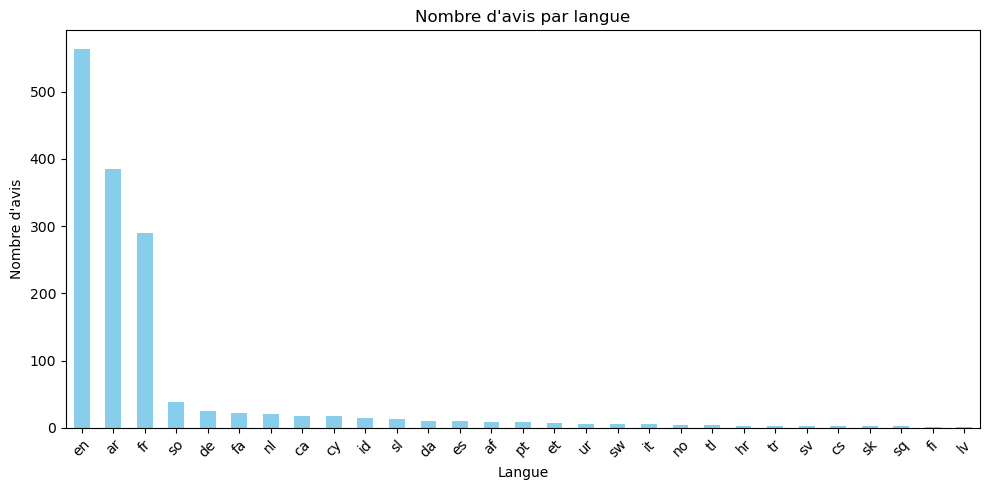

In [25]:
import matplotlib.pyplot as plt

compte_langues.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Nombre d'avis par langue")
plt.xlabel("Langue")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Compter les langues sauf 'fr', 'en' et 'ar'
autres_langues = df[~df['langue'].isin(['fr', 'en', 'ar'])]
compte_autres_langues = autres_langues['langue'].value_counts()

print(compte_autres_langues)
print("Total :", compte_autres_langues.sum())


langue
so    39
fa    26
de    25
nl    20
ca    18
ur    18
cy    18
id    16
sl    15
es    13
af    11
da    10
pt     8
sw     7
et     7
it     5
no     4
tl     4
hr     3
sv     2
tr     2
cs     2
sk     2
sq     2
lv     1
fi     1
Name: count, dtype: int64
Total : 279


In [27]:
# Filtrer les langues autres que 'fr', 'en', 'ar'
autres_langues = df[~df['langue'].isin(['fr', 'en', 'ar'])]

# Concaténer tous les avis en une seule chaîne
texte_total = " ".join(autres_langues['avis_client'].dropna().astype(str))

# Nettoyer et tokeniser (mots alphabétiques uniquement)
mots = re.findall(r'\b\w+\b', texte_total.lower())

# Compter les fréquences des mots
frequences = Counter(mots)

# Convertir en DataFrame trié
df_freq = pd.DataFrame(frequences.items(), columns=['Mot', 'Fréquence'])
df_freq = df_freq.sort_values(by='Fréquence', ascending=False)

In [28]:
df_freq.shape

(525, 2)

In [29]:
df_freq.sort_values(by='Fréquence', ascending=False)

,Mot,Fréquence
26,w,35
23,ooredoo,32
8,5g,32
1,el,28
42,good,21
...,...,...
521,couverte,1
522,ma3endk,1
523,7al,1
495,gamer,1


In [30]:
# Supprimer les mots contenant des chiffres ou d'une seule lettre
mots_filtrés = [mot for mot in mots if mot.isalpha() and len(mot) > 1]

# Compter les fréquences
frequences = Counter(mots_filtrés)

In [31]:
print(frequences)

Counter({'ooredoo': 32, 'el': 28, 'good': 21, 'bien': 17, 'ken': 16, 'jdid': 16, 'fi': 11, 'جدا': 11, 'nbadel': 11, 'fama': 10, 'app': 10, 'جيد': 10, 'fixe': 10, 'tunisie': 10, 'andi': 10, 'mega': 9, 'the': 9, 'hab': 9, 'vpn': 9, 'najem': 8, 'internet': 8, 'bad': 7, 'kifeh': 7, 'ena': 7, 'barcha': 6, 'merci': 6, 'kol': 6, 'is': 6, 'it': 6, 'ya': 6, 'wala': 6, 'chhar': 6, 'fix': 6, 'mela': 6, 'tél': 6, 'at': 6, 'airport': 6, 'in': 6, 'aber': 6, 'mal': 6, 'nach': 6, 'schauen': 6, 'die': 6, 'unübersichtlich': 6, 'beim': 6, 'deleted': 6, 'mbps': 6, 'hata': 5, 'an': 5, 'did': 5, 'abonnement': 5, 'zone': 5, 'bon': 5, 'stable': 4, 'aajebni': 4, 'service': 4, 'bravo': 4, 'no': 4, 'so': 4, 'excellent': 4, 'votre': 4, 'application': 4, 'bel': 4, 'ياسر': 4, 'آل': 4, 'آت': 4, 'آش': 4, 'choflna': 4, 'conx': 4, 'wconx': 4, 'kl': 4, 'mil': 4, 'li': 4, 'commende': 4, 'instant': 4, 'numéro': 4, 'nkalmou': 4, 'yetchra': 4, 'weli': 4, 'mrakeb': 4, 'mn': 4, 'yaaml': 4, 'bch': 4, 'wali': 4, 'kifech': 4, 'd

In [32]:
remplacements = {
    r'\b(ooreedoo|اوريدو|ooredoo)\b': 'ooredoo',
    r'\b(الكنكسيون|connexion|conx|wconx)\b': 'connexion',
    r'\b(barcha|برشا)\b': 'beaucoup',
    r'\b(tunisia|tunisie)\b': 'tunis',
    r'\b(اورنج|orange)\b': 'orange'
}



In [33]:
for motif, remplacement in remplacements.items():
    texte_total = re.sub(motif, remplacement, texte_total)

# Tokenisation
mots = re.findall(r'\b\w+\b', texte_total)

# Filtrage : supprimer mots avec chiffres et mots d'une seule lettre
mots_filtrés = [mot for mot in mots if mot.isalpha() and len(mot) > 1]

# Compter fréquences
frequences = Counter(mots_filtrés)

In [34]:
print(frequences)

Counter({'ooredoo': 30, 'el': 28, 'good': 21, 'jdid': 16, 'Bien': 14, 'ken': 14, 'fi': 11, 'جدا': 11, 'nbadel': 11, 'fama': 10, 'جيد': 10, 'fixe': 10, 'tunis': 9, 'mega': 9, 'the': 9, 'beaucoup': 8, 'internet': 8, 'connexion': 7, 'Ooredoo': 7, 'bad': 7, 'kifeh': 7, 'kol': 6, 'is': 6, 'ya': 6, 'wala': 6, 'chhar': 6, 'fix': 6, 'andi': 6, 'tél': 6, 'at': 6, 'airport': 6, 'in': 6, 'aber': 6, 'mal': 6, 'nach': 6, 'schauen': 6, 'die': 6, 'unübersichtlich': 6, 'hab': 6, 'beim': 6, 'vpn': 6, 'deleted': 6, 'mbps': 6, 'App': 5, 'hata': 5, 'app': 5, 'did': 5, 'abonnement': 5, 'ena': 5, 'bon': 5, 'stable': 4, 'aajebni': 4, 'no': 4, 'so': 4, 'VOTRE': 4, 'APPLICATION': 4, 'bel': 4, 'it': 4, 'ياسر': 4, 'آل': 4, 'آت': 4, 'آش': 4, 'Choflna': 4, 'Conx': 4, 'kL': 4, 'najem': 4, 'mil': 4, 'li': 4, 'Najem': 4, 'commende': 4, 'instant': 4, 'numéro': 4, 'nkalmou': 4, 'yetchra': 4, 'weli': 4, 'mrakeb': 4, 'mn': 4, 'yaaml': 4, 'bch': 4, 'wali': 4, 'Kifech': 4, 'demande': 4, 'Andi': 4, 'ennajem': 4, 'mazal': 4,

In [35]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Pour la reproductibilité

def detect_lang(word):
    try:
        # Langdetect peut échouer sur les mots courts, donc gérer l'exception
        return detect(word)
    except:
        return "unknown"

# Appliquer la détection de langue sur la colonne 'Mot'
df_freq['Langue_detectee'] = df_freq['Mot'].apply(detect_lang)

print(df_freq.head(10))


         Mot  Fréquence Langue_detectee
26         w         35              sw
8         5g         32              cy
23   ooredoo         32              nl
1         el         28              es
42      good         21              so
30      bien         17              lv
196     jdid         16              et
127      ken         16              fi
197       4g         12              cy
147      جدا         11              ur


In [36]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Pour la reproductibilité

def detect_lang(word):
    try:
        # Langdetect peut échouer sur les mots courts, donc gérer l'exception
        return detect(word)
    except:
        return "unknown"

# Appliquer la détection de langue sur la colonne 'Mot'
df_freq['Langue_detectee'] = df_freq['Mot'].apply(detect_lang)

print(df_freq.head(20))



         Mot  Fréquence Langue_detectee
26         w         35              sw
8         5g         32              cy
23   ooredoo         32              nl
1         el         28              es
42      good         21              so
30      bien         17              lv
196     jdid         16              et
127      ken         16              fi
197       4g         12              cy
147      جدا         11              ur
137        i         11              af
7         fi         11              en
193   nbadel         11              so
61         0         10         unknown
218  tunisie         10              fi
148      جيد         10              ar
28      fama         10              pt
195     fixe         10              ca
269       50         10         unknown
60       app         10              it


In [37]:
import pandas as pd
from collections import Counter
import re

# Filtrer les langues autres que 'fr', 'en', 'ar'
autres_langues = df[~df['langue'].isin(['fr', 'en', 'ar'])]

# Concaténer tous les avis en une seule chaîne
texte_total = " ".join(autres_langues['avis_client'].dropna().astype(str)).lower()

# Remplacer les variantes connues
remplacements = {
    r'\b(ooreedoo|اوريدو|ooredoo)\b': 'ooredoo',
    r'\b(الكنكسيون|connexion|conx|wconx)\b': 'connexion',
    r'\b(barcha|برشا)\b': 'beaucoup',
    r'\b(tunisia|tunisie)\b': 'tunis',
    r'\b(اورنج|orange)\b': 'orange',
    r'\b(جدا)\b': 'جيد',
    r'\bapp\b': 'application',
    r'\bfixe\b': 'fix'
}

for motif, remplacement in remplacements.items():
    texte_total = re.sub(motif, remplacement, texte_total)

# Tokenisation
mots = re.findall(r'\b\w+\b', texte_total)

# Filtrage : supprimer mots avec chiffres et mots d'une seule lettre
mots_filtrés = [mot for mot in mots if mot.isalpha() and len(mot) > 1]

# Compter fréquences
frequences = Counter(mots_filtrés)

# Créer le DataFrame
df_freq = pd.DataFrame(frequences.items(), columns=['Mot', 'Fréquence'])
df_freq = df_freq.sort_values(by='Fréquence', ascending=False)

# Exporter vers Excel
df_freq.to_excel("frequence_mots_autres_langues_m.xlsx", index=False)

print("Fichier 'frequence_mots_autres_langues.xlsx' créé avec succès.")


Fichier 'frequence_mots_autres_langues.xlsx' créé avec succès.


In [38]:
df_freq.shape

(421, 2)

In [39]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Pour avoir des résultats reproductibles
import pandas as pd

def detect_lang_word(word):
    try:
        lang = detect(word)
        if lang in ['fr', 'en', 'ar']:
            return lang
        else:
            return 'unknown'
    except:
        return 'unknown'

# Appliquer la détection seulement aux mots de df_freq
df_freq['Langue_detectee'] = df_freq['Mot'].apply(detect_lang_word)

print(df_freq.head(20))


             Mot  Fréquence Langue_detectee
15       ooredoo         37         unknown
0             el         28         unknown
111          جيد         21              ar
28          good         21         unknown
20          bien         17         unknown
93           ken         16         unknown
140          fix         16         unknown
141         jdid         16         unknown
39   application         14         unknown
4             fi         11              en
138       nbadel         11         unknown
8      connexion         11              fr
18          fama         10         unknown
157        tunis         10         unknown
162         andi         10              en
191         mega          9         unknown
205          the          9              en
275          vpn          9         unknown
232          hab          9         unknown
1       beaucoup          8              fr


In [40]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
import pandas as pd

# Listes des mots à forcer en français ou en anglais
force_fr = {'ooredoo', 'bien', 'tunis','fix' ,'application'}
force_en = {'good'}

def detect_lang_word_force(word):
    if word in force_fr:
        return 'fr'
    if word in force_en:
        return 'en'
    try:
        lang = detect(word)
        if lang in ['fr', 'en', 'ar']:
            return lang
        else:
            return 'unknown'
    except:
        return 'unknown'

# Appliquer sur df_freq
df_freq['Langue_detectee'] = df_freq['Mot'].apply(detect_lang_word_force)

print(df_freq.head(20))


             Mot  Fréquence Langue_detectee
15       ooredoo         37              fr
0             el         28         unknown
111          جيد         21              ar
28          good         21              en
20          bien         17              fr
93           ken         16         unknown
140          fix         16              fr
141         jdid         16         unknown
39   application         14              fr
4             fi         11              en
138       nbadel         11         unknown
8      connexion         11              fr
18          fama         10         unknown
157        tunis         10              fr
162         andi         10              en
191         mega          9         unknown
205          the          9              en
275          vpn          9         unknown
232          hab          9         unknown
1       beaucoup          8              fr


In [41]:
import re
from collections import Counter

# Étape 1 : dictionnaire mot → langue
dict_mot_lang = dict(zip(df_freq['Mot'], df_freq['Langue_detectee']))

def detect_lang_avis(texte):
    if not isinstance(texte, str):
        return 'unknown'
    # Tokenisation simple (à adapter si nécessaire)
    mots = re.findall(r'\b\w+\b', texte.lower())
    langues = [dict_mot_lang.get(mot, 'unknown') for mot in mots]
    
    # Compter les occurrences de chaque langue sauf 'unknown'
    compte_langues = Counter([l for l in langues if l != 'unknown'])
    if compte_langues:
        # Retourner la langue la plus fréquente
        return compte_langues.most_common(1)[0][0]
    else:
        return 'unknown'

# Appliquer la détection sur df['avis client']
df['Langue_corrigee'] = df['avis_client'].apply(detect_lang_avis)

# Afficher un aperçu
print(df[['avis_client', 'Langue_corrigee']].head(10))


                                    avis_client Langue_corrigee
0        Excellent 5G coverage, very satisfied!         unknown
1  La couverture est excellente dans ma région.              fr
2               تغطية 5G ممتازة، أنا راضٍ جدًا!         unknown
3                                 كنكسيون خايبة         unknown
4  La 5G fonctionne bien mais parfois instable.              fr
5  Customer service didn't respond to my issue.              en
6      5G works well but is sometimes unstable.         unknown
7                                   reseau null         unknown
8       Le réseau est trop lent dans ma région.              fr
9        Excellent 5G coverage, very satisfied!         unknown


In [42]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Pour résultats stables
import pandas as pd

def detect_lang_text(text):
    try:
        if isinstance(text, str) and text.strip():
            return detect(text)
        else:
            return 'unknown'
    except:
        return 'unknown'

# Appliquer sur la colonne 'avis client'
df['Langue_detectee'] = df['avis_client'].apply(detect_lang_text)

print(df[['avis_client', 'Langue_detectee']].head(10))


                                    avis_client Langue_detectee
0        Excellent 5G coverage, very satisfied!              en
1  La couverture est excellente dans ma région.              fr
2               تغطية 5G ممتازة، أنا راضٍ جدًا!              ar
3                                 كنكسيون خايبة              ar
4  La 5G fonctionne bien mais parfois instable.              fr
5  Customer service didn't respond to my issue.              en
6      5G works well but is sometimes unstable.              en
7                                   reseau null              ro
8       Le réseau est trop lent dans ma région.              fr
9        Excellent 5G coverage, very satisfied!              en


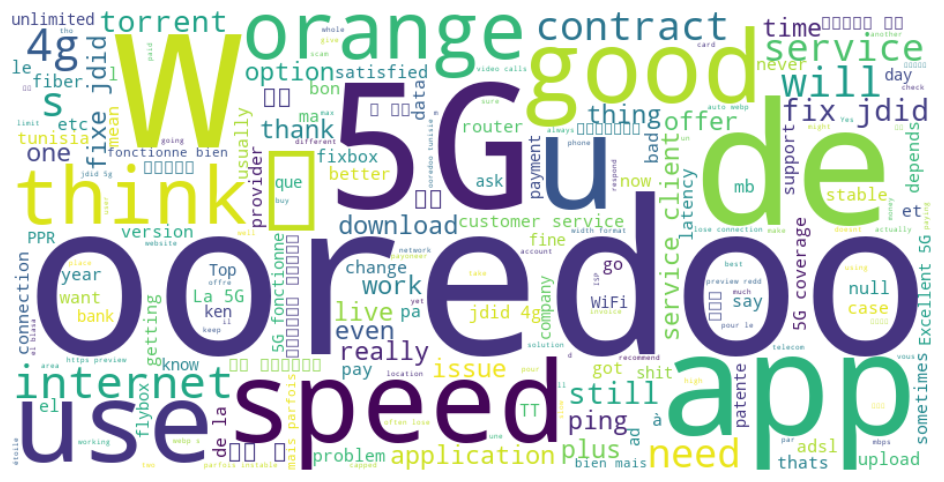

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fusionner tous les avis en un seul grand texte
texte_complet = " ".join(df['avis_client'].dropna().astype(str))

# Créer un word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'  # tu peux changer la palette de couleurs
).generate(texte_complet)

# Afficher le word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # cacher les axes
plt.show()


In [44]:
# Texte global nettoyé
def nettoyer_texte(texte):
    texte = texte.lower()
    texte = re.sub(r'\W+', ' ', texte)  # supprimer les caractères spéciaux
    texte = ' '.join([mot for mot in texte.split() if len(mot) > 2])  # enlever les mots courts
    return texte

texte_clean = " ".join([nettoyer_texte(str(x)) for x in df['avis_client']])

In [45]:
from wordcloud import WordCloud, STOPWORDS
# Ajouter des stopwords personnalisés
stopwords = set(STOPWORDS)
stopwords.update(["w", "u", "got", "did", "use", "fixe", "fonctionne", "app", "application", "جيد", "جدا", "5g", "4g"])


In [46]:
# Dictionnaire de remplacements
remplacements = {
    "app": "application",
    "appli": "application",
    "5g": "5g",
    "5 g": "5g",
    "5G": "5g",
    "5g jdid": "5g",
    "4g": "4g",
    "4 g": "4g",
    "connexion": "connection",
    "internet": "internet",
    "جيد": "bien",
    "جدا": "bien",
    # tu peux en ajouter d'autres ici
}

def normaliser_texte(texte):
    texte = texte.lower()
    for ancien, nouveau in remplacements.items():
        texte = re.sub(rf'\b{re.escape(ancien)}\b', nouveau, texte)
    return texte


In [47]:
df['avis_normalise'] = df['avis_client'].astype(str).apply(normaliser_texte)


In [48]:
import arabic_reshaper
from bidi.algorithm import get_display

def traiter_arabe(texte):
    try:
        texte = arabic_reshaper.reshape(texte)
        texte = get_display(texte)
    except:
        pass
    return texte


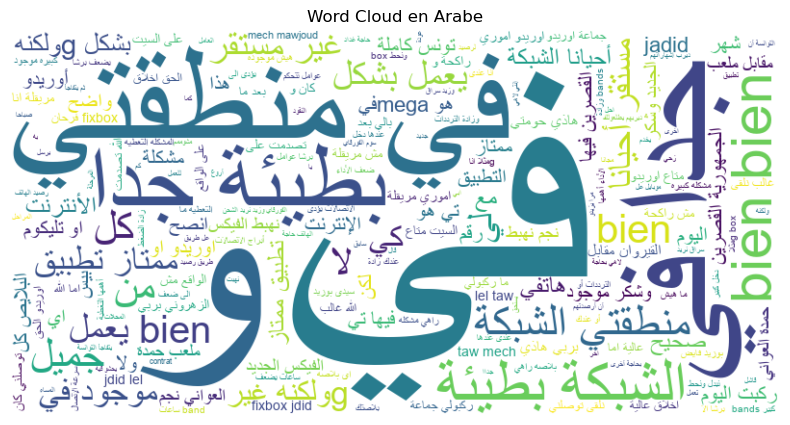

In [49]:
texte_arabe = " ".join(df[df['Langue_corrigee'] == 'ar']['avis_normalise'].dropna().astype(str))
texte_arabe = traiter_arabe(texte_arabe)

wordcloud_ar = WordCloud(
    font_path='arial.ttf',
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(texte_arabe)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ar, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud en Arabe")
plt.show()


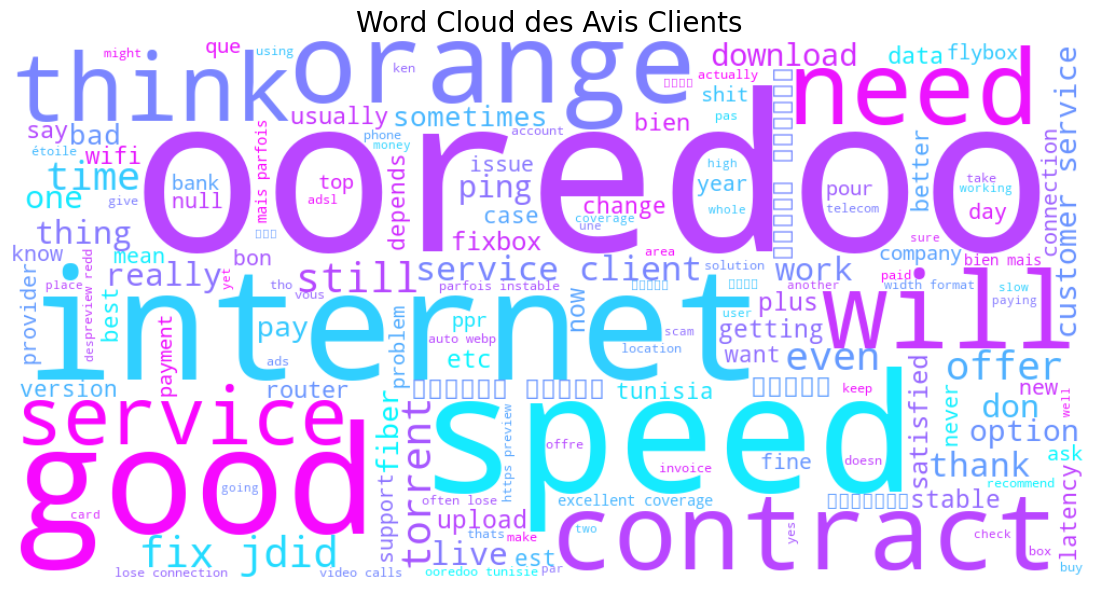

In [50]:
# Génération du word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='cool',
    max_words=150,
    stopwords=stopwords
).generate(texte_clean)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud des Avis Clients", fontsize=20)
plt.show()

# ___________________

In [52]:
import pandas as pd
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import re

In [53]:
# Exemple de données
# df = pd.read_csv("avis_clients.csv")  # Votre DataFrame avec une colonne "avis"
# Exemple test : fusion de toutes les données texte
texte = " ".join(df['avis_normalise'].dropna().astype(str))

# Nettoyage basique
texte = re.sub(r'[^\w\s\u0600-\u06FF]', '', texte)  # Garde lettres latines + arabes

# Séparer les mots
mots = texte.split()

# Stopwords personnalisés
stopwords = set(STOPWORDS)
stopwords.update(["le", "la", "les", "de", "des", "du", "et", "en", "un", "une", "avec", "pour", "au", "aux", "ce", "cette"])
stopwords.update(["جدا", "الى", "على", "في", "من", "ما", "عن", "و", "يا", "انه", "انها"])  # Arabe
stopwords.update(["the", "is", "and", "to", "a", "of", "in", "it", "for", "on", "with", "this", "that"])  # Anglais


In [54]:
# Préparation du texte final
texte_final = ""

for mot in mots:
    try:
        langue = detect(mot)
        if mot.lower() in stopwords:
            continue
        if langue == 'ar':
            reshaped_text = arabic_reshaper.reshape(mot)
            bidi_text = get_display(reshaped_text)
            texte_final += " " + bidi_text
        else:
            texte_final += " " + mot.lower()
    except:
        continue  # Ignore les erreurs de détection


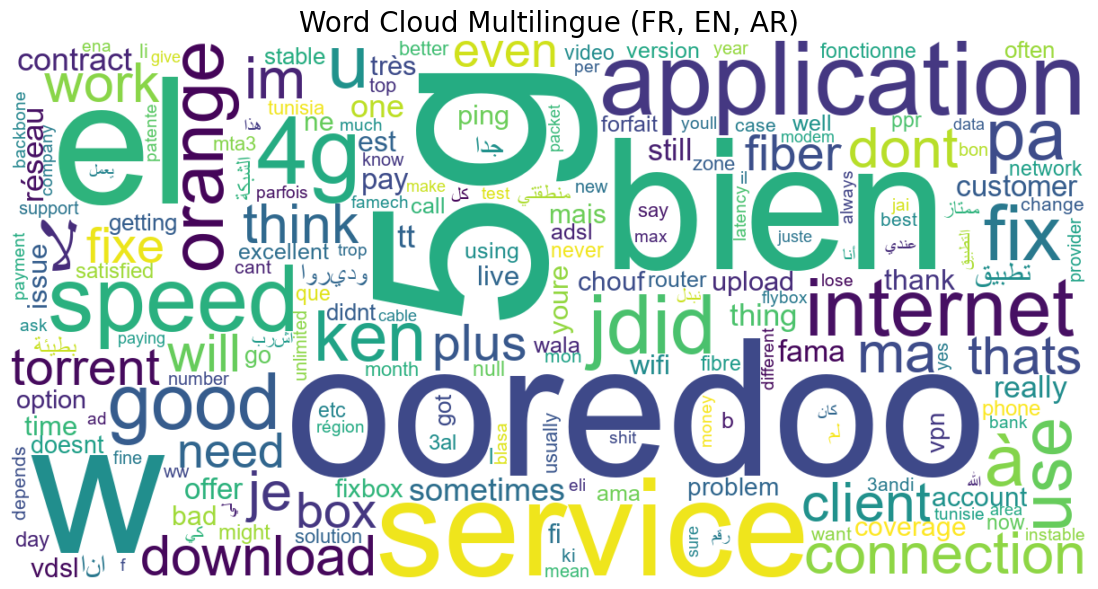

In [55]:
# Création du Word Cloud
wordcloud = WordCloud(
    font_path='arial.ttf',  # Assurez-vous que la police supporte l’arabe
    width=1200,
    height=600,
    background_color='white',
    collocations=False,
    regexp=r"\w+",
    stopwords=stopwords
).generate(texte_final)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Multilingue (FR, EN, AR)", fontsize=20)
plt.show()

In [113]:
import pandas as pd
from langdetect import detect
import re

# Exemple de texte combiné depuis une colonne 'avis'
texte = " ".join(df['avis_client'].dropna().astype(str))

# Nettoyage basique
texte = re.sub(r'[^\w\s\u0600-\u06FF]', '', texte)
mots = texte.split()

# Liste pour stocker les résultats
liste_mots_langue = []

# Boucle pour détecter la langue de chaque mot
for mot in mots:
    try:
        langue = detect(mot)
        liste_mots_langue.append({"mot": mot, "langue": langue})
    except:
        continue  # Ignore les erreurs

# Création d’un DataFrame
df_langue = pd.DataFrame(liste_mots_langue)

# Supprimer les doublons
df_langue = df_langue.drop_duplicates()

# Export en Excel
df_langue.to_excel("mots_detectes_langue.xlsx", index=False)

print("✅ Fichier 'mots_detectes_langue.xlsx' généré avec succès.")


✅ Fichier 'mots_detectes_langue.xlsx' généré avec succès.
